In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
%cd "drive/MyDrive/aa/tp7_3"
%pwd

[Errno 2] No such file or directory: 'drive/MyDrive/aa/tp7_3'
/content/drive/MyDrive/aa/tp7_3


'/content/drive/My Drive/aa/tp7_3'

**Classificação de tipos de lírios**

In [42]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import random

In [53]:
def plot_loss_acc(hist):
  plt.figure()
  plt.plot(hist.history['loss'], label='train_loss')
  plt.plot(hist.history['val_loss'], label='val_loss')
  plt.plot(hist.history['accuracy'], label='train_acc')
  plt.plot(hist.history['val_accuracy'], label='val_acc')
  plt.title('Training Loss and Accuracy')
  plt.xlabel('Epoch #')
  plt.ylabel('Loss/Accuracy')
  plt.margins(x=0)
  plt.margins(y=0)
  plt.legend()
  plt.show()

Começemos por carregar os dados de treino. Como estes estão ordenados por classes, é conveniente mudar, de forma aleatória, a sua ordem.

Para além disso, temos de normalizar o conjunto de entrada, de forma a garantir que as caraterísticas são consideradas de igual modo.

Nos problemas de classificação, um passo importante a fazer é recodificar as classes.

Para isso, como neste caso temos três classes, consideramos três neurónios, e usamos uma técnica usualmente denominada one-hot enconding.

*Neste exemplo, a classe 0 (Setosa) é codificada no vector (1,0,0), a classe 1 (Versicolor) e a classe 2 (Virginica) é codificada no vector (0,0,1).*



In [43]:
mat = np.loadtxt('iris.txt')
np.random.shuffle(mat)
x = mat[:,:-1]
x = (x-np.mean(x,axis=0))/np.std(x,axis=0)
y_orig = mat[:,-1]
y = to_categorical(y_orig)


*   Nos problemas de classificação com múltiplas classes, iremos usar *Categorical Cross Entropy* como função de erro.
*   A última camada deverá ter três neurónios. Esta camada a função de ativação deverá ser *softmax* , que permite que o valor de cada neurónio de saída possa ser visto como a probabilidade de pertencer a essa classe.
* Nos problemas de classificação, para além do erro (*loss*), podemos considerar a exatidão (*accuracy*), que é a proporção de exemplos bem classificados.





Começemos por construir um modelo (**Modelo1**) com apenas uma camada com três neurónios e ativação *softmax*. 
*   epochs = 400
*   batch = 16



In [44]:
opt = keras.optimizers.SGD(momentum=0.9,learning_rate=0.05)

In [45]:
keras.backend.clear_session()

model = keras.Sequential([
  keras.layers.Dense(3,activation='softmax')  
])

model.compile(optimizer=opt,loss='categorical_crossentropy',metrics='accuracy')
model.fit(x,y,epochs=400,batch_size=16)

Epoch 1/400
10/10 [==============================] - 0s 1ms/step - loss: 0.8513 - accuracy: 0.5267
Epoch 2/400
10/10 [==============================] - 0s 928us/step - loss: 0.4319 - accuracy: 0.8267
Epoch 3/400
10/10 [==============================] - 0s 1ms/step - loss: 0.3283 - accuracy: 0.8533
Epoch 4/400
10/10 [==============================] - 0s 966us/step - loss: 0.2866 - accuracy: 0.8800
Epoch 5/400
10/10 [==============================] - 0s 1ms/step - loss: 0.2483 - accuracy: 0.9200
Epoch 6/400
10/10 [==============================] - 0s 927us/step - loss: 0.2233 - accuracy: 0.9400
Epoch 7/400
10/10 [==============================] - 0s 1ms/step - loss: 0.2031 - accuracy: 0.9400
Epoch 8/400
10/10 [==============================] - 0s 1ms/step - loss: 0.1882 - accuracy: 0.9667
Epoch 9/400
10/10 [==============================] - 0s 1ms/step - loss: 0.1764 - accuracy: 0.9600
Epoch 10/400
10/10 [==============================] - 0s 1ms/step - loss: 0.1678 - accuracy: 0.9667
Epo

**Modelo 2**
Adicionemos mais uma camada escondida com ativação ReLU, antes da camada de saída softmax.

In [46]:
keras.backend.clear_session()

model = keras.Sequential([
  keras.layers.Dense(3,activation="relu"),
  keras.layers.Dense(3,activation='softmax')  
])

model.compile(optimizer=opt,loss='categorical_crossentropy',metrics='accuracy')
model.fit(x,y,epochs=400,batch_size=16)

Epoch 1/400
10/10 [==============================] - 0s 1ms/step - loss: 0.9541 - accuracy: 0.6267
Epoch 2/400
10/10 [==============================] - 0s 1ms/step - loss: 0.6301 - accuracy: 0.8200
Epoch 3/400
10/10 [==============================] - 0s 1ms/step - loss: 0.4694 - accuracy: 0.8333
Epoch 4/400
10/10 [==============================] - 0s 1ms/step - loss: 0.3629 - accuracy: 0.8667
Epoch 5/400
10/10 [==============================] - 0s 1ms/step - loss: 0.2785 - accuracy: 0.8933
Epoch 6/400
10/10 [==============================] - 0s 1ms/step - loss: 0.2096 - accuracy: 0.9200
Epoch 7/400
10/10 [==============================] - 0s 1ms/step - loss: 0.1913 - accuracy: 0.9333
Epoch 8/400
10/10 [==============================] - 0s 1ms/step - loss: 0.1276 - accuracy: 0.9733
Epoch 9/400
10/10 [==============================] - 0s 980us/step - loss: 0.0996 - accuracy: 0.9667
Epoch 10/400
10/10 [==============================] - 0s 2ms/step - loss: 0.0912 - accuracy: 0.9800
Epoch 1

Do **modelo 1** para o **modelo 2** não se nota grande diferença.


Adicionemos mais uma camada escondida.

**Modelo 3:**

In [47]:
keras.backend.clear_session()

model = keras.Sequential([
  keras.layers.Dense(3,activation='relu'),
  keras.layers.Dense(3,activation='relu'),
  keras.layers.Dense(3,activation='softmax')  
])

model.compile(optimizer=opt,loss='categorical_crossentropy',metrics='accuracy')
model.fit(x,y,epochs=400,batch_size=16)

#model.save_weights('modelo_3.h5') # Guardemos este pesos visto que aparenta ser um bom modelo

Epoch 1/400
10/10 [==============================] - 0s 1ms/step - loss: 0.9475 - accuracy: 0.6333
Epoch 2/400
10/10 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.7667
Epoch 3/400
10/10 [==============================] - 0s 1ms/step - loss: 0.4865 - accuracy: 0.8333
Epoch 4/400
10/10 [==============================] - 0s 1ms/step - loss: 0.3415 - accuracy: 0.8600
Epoch 5/400
10/10 [==============================] - 0s 1ms/step - loss: 0.2810 - accuracy: 0.8933
Epoch 6/400
10/10 [==============================] - 0s 1ms/step - loss: 0.1990 - accuracy: 0.9400
Epoch 7/400
10/10 [==============================] - 0s 1ms/step - loss: 0.1906 - accuracy: 0.9267
Epoch 8/400
10/10 [==============================] - 0s 1ms/step - loss: 0.1551 - accuracy: 0.9267
Epoch 9/400
10/10 [==============================] - 0s 1ms/step - loss: 0.1336 - accuracy: 0.9533
Epoch 10/400
10/10 [==============================] - 0s 1ms/step - loss: 0.1480 - accuracy: 0.9533
Epoch 11/

Continuamos sem verificar grandes diferenças.

Adicionemos outra camada.

**Modelo 4:**

In [48]:
keras.backend.clear_session()

model = keras.Sequential([
  keras.layers.Dense(3,activation='relu'),
  keras.layers.Dense(3,activation='relu'),
  keras.layers.Dense(3,activation='relu'),
  keras.layers.Dense(3,activation='softmax')  
])

model.compile(optimizer=opt,loss='categorical_crossentropy',metrics='accuracy')
model.fit(x,y,epochs=400,batch_size=16)

model.summary()

Epoch 1/400
10/10 [==============================] - 0s 1ms/step - loss: 1.0636 - accuracy: 0.4267
Epoch 2/400
10/10 [==============================] - 0s 1ms/step - loss: 0.8833 - accuracy: 0.6000
Epoch 3/400
10/10 [==============================] - 0s 1ms/step - loss: 0.6675 - accuracy: 0.7067
Epoch 4/400
10/10 [==============================] - 0s 1ms/step - loss: 0.5687 - accuracy: 0.7467
Epoch 5/400
10/10 [==============================] - 0s 1ms/step - loss: 0.5258 - accuracy: 0.7533
Epoch 6/400
10/10 [==============================] - 0s 1ms/step - loss: 0.4107 - accuracy: 0.8600
Epoch 7/400
10/10 [==============================] - 0s 1ms/step - loss: 0.4293 - accuracy: 0.8467
Epoch 8/400
10/10 [==============================] - 0s 1ms/step - loss: 0.3665 - accuracy: 0.8867
Epoch 9/400
10/10 [==============================] - 0s 1ms/step - loss: 0.2672 - accuracy: 0.9667
Epoch 10/400
10/10 [==============================] - 0s 1ms/step - loss: 0.2344 - accuracy: 0.9533
Epoch 11/

Podemos verificar que não há um melhoramento significativo ao adicionar mais camadas escondidas. Passemos à frente.

Para além do conjunto de treino, podemos também considerar um conjunto de validação.

Utilizemos o **Modelo 3** (2 camadas escondidas).

In [55]:
keras.backend.clear_session()

model = keras.Sequential([
  keras.layers.Dense(3,activation='relu'),
  keras.layers.Dense(3,activation='relu'),
  keras.layers.Dense(3,activation='softmax')  
])

model.compile(optimizer=opt,loss='categorical_crossentropy',metrics='accuracy')

hist = model.fit(x,y,validation_split=0.2,epochs=400,batch_size=16)

Epoch 1/400
8/8 [==============================] - 0s 19ms/step - loss: 0.9852 - accuracy: 0.6583 - val_loss: 0.7582 - val_accuracy: 0.6667
Epoch 2/400
8/8 [==============================] - 0s 3ms/step - loss: 0.6818 - accuracy: 0.7250 - val_loss: 0.6408 - val_accuracy: 0.7000
Epoch 3/400
8/8 [==============================] - 0s 3ms/step - loss: 0.5636 - accuracy: 0.7333 - val_loss: 0.5246 - val_accuracy: 0.7000
Epoch 4/400
8/8 [==============================] - 0s 3ms/step - loss: 0.4723 - accuracy: 0.8000 - val_loss: 0.4630 - val_accuracy: 0.7000
Epoch 5/400
8/8 [==============================] - 0s 3ms/step - loss: 0.4125 - accuracy: 0.8417 - val_loss: 0.4434 - val_accuracy: 0.7000
Epoch 6/400
8/8 [==============================] - 0s 3ms/step - loss: 0.3886 - accuracy: 0.8500 - val_loss: 0.4306 - val_accuracy: 0.7000
Epoch 7/400
8/8 [==============================] - 0s 3ms/step - loss: 0.3597 - accuracy: 0.8583 - val_loss: 0.4198 - val_accuracy: 0.7333
Epoch 8/400
8/8 [=========

Visualizemos o gráfico da evolução do erro e da exatidão, tanto de treino como de validação, ao longo das várias épocas do treino da rede.

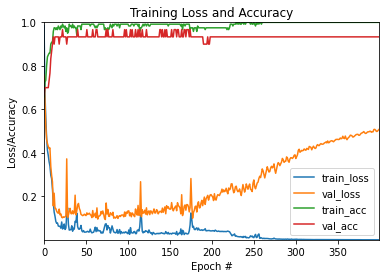

In [56]:
plot_loss_acc(hist) 

Podemos verificar que a partir da época 150, o nosso validation_loss está a ficar superior ao training_loss pelo que podemos estar perante um overfitting (o nosso modelo está-se a ajustar muito bem ao training_set mas não ao validation_set).

Experimentemos com outro modelo (um com menos camadas escondidas).

**Modelo 4**:


In [57]:
keras.backend.clear_session()

model = keras.Sequential([
  keras.layers.Dense(3,activation='relu'),
  keras.layers.Dense(3,activation='softmax')  
])

model.compile(optimizer=opt,loss='categorical_crossentropy',metrics='accuracy')

hist = model.fit(x,y,validation_split=0.2,epochs=400,batch_size=16)


Epoch 1/400
8/8 [==============================] - 0s 16ms/step - loss: 0.7485 - accuracy: 0.7250 - val_loss: 0.6667 - val_accuracy: 0.6000
Epoch 2/400
8/8 [==============================] - 0s 3ms/step - loss: 0.5636 - accuracy: 0.8167 - val_loss: 0.5403 - val_accuracy: 0.7333
Epoch 3/400
8/8 [==============================] - 0s 3ms/step - loss: 0.4637 - accuracy: 0.7917 - val_loss: 0.4665 - val_accuracy: 0.7333
Epoch 4/400
8/8 [==============================] - 0s 3ms/step - loss: 0.3975 - accuracy: 0.8500 - val_loss: 0.4365 - val_accuracy: 0.7333
Epoch 5/400
8/8 [==============================] - 0s 3ms/step - loss: 0.3556 - accuracy: 0.8667 - val_loss: 0.4000 - val_accuracy: 0.8000
Epoch 6/400
8/8 [==============================] - 0s 4ms/step - loss: 0.3198 - accuracy: 0.8833 - val_loss: 0.3699 - val_accuracy: 0.8000
Epoch 7/400
8/8 [==============================] - 0s 3ms/step - loss: 0.2913 - accuracy: 0.8750 - val_loss: 0.3365 - val_accuracy: 0.8667
Epoch 8/400
8/8 [=========

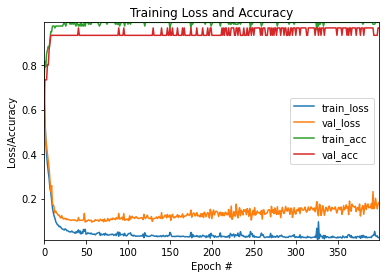

In [58]:
plot_loss_acc(hist)

Ao analisarmos o gráfico, podemos verificar que este modelo se ajusta muito melhor ao nosso validation_set, i.e., como o val_loss se aproxima do train_loss temos que o nosso modelo, após ser treinado por um dataset, está a classificar decentemente outro dataset. 